40
28
33


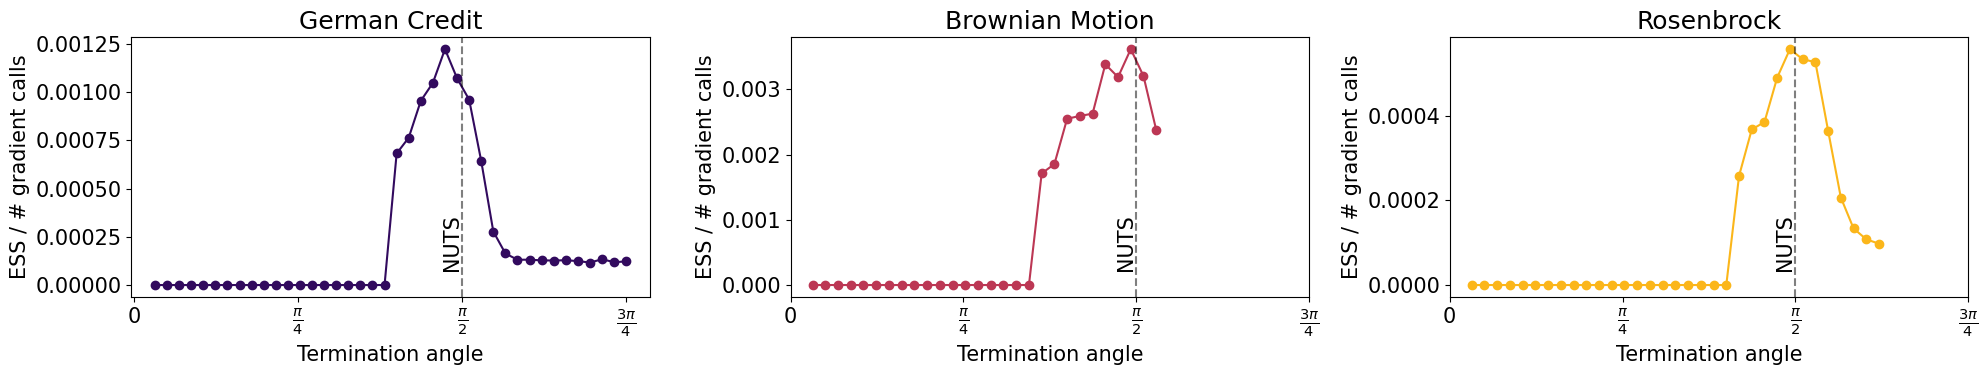

In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size': 15})

def axvline_with_label(x, label, color= 'black', ls= '--', yloc= 0.2):
    ax = plt.gca()
    ax.axvline(x, color= color, ls = ls, alpha = 0.5)
    ax.text(x, 0.1, label, color= color, ha='right', va='bottom', rotation=90,
            transform=ax.get_xaxis_transform())


def load(name):

    cosangle, ess = [],[]
    dir = '../../results/' + str(name)

    for subdir in os.listdir(dir):
        start = 'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:True_'+name+'_cosangle='
        if re.search(start, subdir):
            #print(re.search(r'[0-9].csv', subdir))
            cosangle.append(float(subdir[len(start):-4]))
            df= pd.read_csv(os.path.join(dir, subdir))
            n = df[df['max'] & (df['statistic']=='square')]['num_grads_to_low_error'].item()
            ess.append(100./n)

    angle = np.arccos(cosangle)
    perm = np.argsort(angle)
    angle = angle[perm]
    ess= np.array(ess)[perm]
    print(len(ess))
    #print(np.min(np.abs(cosangle)))
    return angle, ess



name = [#'ICG', 
        'vector_german_credit_numeric_sparse_logistic_regression',
        'vector_brownian_motion_unknown_scales_missing_middle_observations', 
        'rosenbrock_36d']


pretty_name = [#'Standard Gaussian', 
               'German Credit', 
               'Brownian Motion', 
               'Rosenbrock'
               ]

plt.figure(figsize= (20, 4))


for i in range(len(name)):
       
    plt.subplot(1, 3, i + 1)
    plt.title(pretty_name[i])
    color = matplotlib.cm.inferno((i + 0.5) / len(name))
    plt.plot(*load(name[i]), 'o-', color=color)
    
    plt.xticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3 \pi}{4}$'])
    #axvline_with_label(np.pi / 4, 'NOTS')
    axvline_with_label(np.pi / 2, 'NUTS')
    plt.xlabel('Termination angle')
    plt.ylabel('ESS / # gradient calls')
    
plt.tight_layout()
    
plt.show()


In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size': 15})


def load(name):

    dir = '../../results/' + str(name)
    file = 'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:True_'+name+'_cosangle=0.csv'
    df= pd.read_csv(os.path.join(dir, file))
    n = df[~df['max'] & (df['statistic']=='square')]['num_grads_to_low_error'].item()
    ess = n

    return ess


name = ['ICG', 
        'vector_german_credit_numeric_sparse_logistic_regression',
        'vector_brownian_motion_unknown_scales_missing_middle_observations', 
        'rosenbrock_36d'][1:2]


pretty_name = ['Standard Gaussian', 
               'German Credit', 
               'Brownian Motion', 
               'Rosenbrock'
               ][1:2]

df = pd.Series(index= pretty_name, data = [load(nam) for nam in name])
df
  

German Credit    10252.347966
dtype: float64

In [6]:
100 / 2697.589688

0.03707012984400169

In [ ]:
Standard Gaussian     2697.589688
German Credit        11843.374725
Brownian Motion       5337.720463
Rosenbrock           33510.186086